<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/LS_DS4_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [ ]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [ ]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [ ]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [ ]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [ ]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [83]:
concepts.describe()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
count,590,6,590,530,1,8,1,24,590,534,534,534,2,1,534,590
unique,590,6,6,488,1,1,1,18,588,507,351,3,2,1,142,82
top,diarrhoeal_deaths_in_newborn_total_deaths,"{""palette"": {""muslim"": ""#71c44c"", ""christian"":...",measure,The average number of years of school attended...,GDP per capita based on purchasing power parit...,geo,"[""world_6region"", ""income_groups"", ""landlocked...",https://github.com/open-numbers/ddf--gapminder...,Extreme temperature affected annual number,Females aged 15+,Mean years in school,"[""linear"", ""log""]","Gapminder based on World Bank, A. Maddison, M....",This data is compiled mainly from these source...,https://www.ilo.org/ilostat/,_none
freq,1,1,537,15,1,8,1,4,2,3,15,438,1,1,58,49


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [ ]:
# Give me working code to merge income, lifespan, and population
#df = pd.merge(income, lifespan)
#df = pd.merge(df, population)
df = income.merge(lifespan).merge(population)

In [17]:
df.shape

(40437, 5)

In [18]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

In [19]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [20]:
# We still need - regions and nice country name
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [21]:
entities[['country', 'name', 'world_6region']].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [22]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [23]:
df = pd.merge(df, entities[['country', 'name', 'world_6region']],
              left_on='geo', right_on='country')
df.shape

(40437, 8)

In [24]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [25]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [26]:
df = df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})
df.tail()

,year,income,lifespan,population,country,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


## Explore data

In [27]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [28]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [29]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [30]:
df[df['year'] == 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [31]:
df[df['year'] == 1918].skew()  # What happened in 1918?

year          0.000000
income        2.161759
lifespan      0.815414
population    9.000622
dtype: float64

In [32]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Palestine,europe_central_asia
freq,219,10778


In [33]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [34]:
# Let's check out the USA at 1818, 1918, 2018
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [35]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [36]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [37]:
now.head()

,year,income,lifespan,population,country,region
218,2018,1867,58.69,36373176,Afghanistan,south_asia
437,2018,5846,65.19,30774205,Angola,sub_saharan_africa
656,2018,12424,78.01,2934363,Albania,europe_central_asia
922,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa
1141,2018,18942,76.97,44688864,Argentina,america


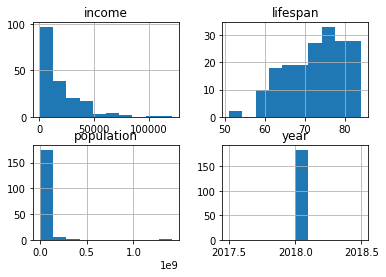

In [38]:
now.hist();

In [ ]:
pd.plotting.scatter_matrix(now);

In [ ]:
help(sns.relplot)

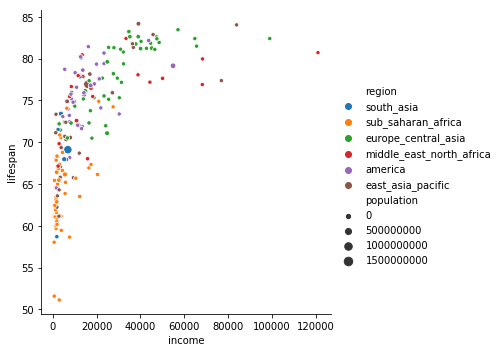

In [41]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now);

In [ ]:
# Log base 10 of 100 = 2
# 10^2 = 100
# "A log is (gives you) an exponent"

In [43]:
import numpy as np

now['log_income'] = np.log(now['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
now['log_income'].describe()

count    184.000000
mean       9.170772
std        1.225316
min        6.444131
25%        8.168329
50%        9.380024
75%       10.127984
max       11.703819
Name: log_income, dtype: float64

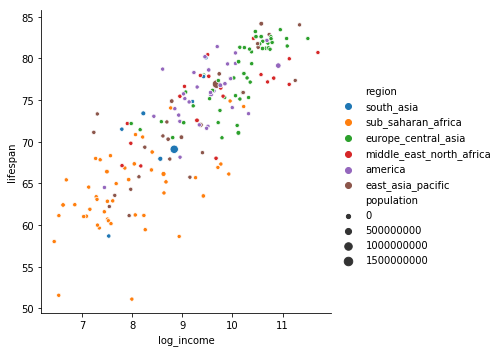

In [45]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
            data=now);

In [ ]:
# Stretch goals/assignment - continue exploring/tweaking
# to make it more like Gapminder, or otherwise cool/informative

# Specific goals:
# Trying to make the bubble size a bit more informative/varied
# Adding annotations for countries
# Generating many frames and/or animating

## Analyze outliers

In [47]:
now[now['income'] > 80000].sort_values(by='income')

,year,income,lifespan,population,country,region,log_income
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa,11.703819


In [177]:
now.country.value_counts()

Central African Republic    1
Montenegro                  1
Malta                       1
Tonga                       1
Niger                       1
South Sudan                 1
Albania                     1
Bulgaria                    1
Philippines                 1
Ecuador                     1
Turkmenistan                1
Canada                      1
Bolivia                     1
Iran                        1
India                       1
Panama                      1
Guinea-Bissau               1
Nepal                       1
China                       1
Saudi Arabia                1
Turkey                      1
Mozambique                  1
Lithuania                   1
Brazil                      1
Yemen                       1
Romania                     1
Solomon Islands             1
St. Lucia                   1
Norway                      1
Ireland                     1
                           ..
Lebanon                     1
Cameroon                    1
Luxembourg

In [48]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar['income'].values[0]
qatar_lifespan = qatar['lifespan'].values[0]
print(qatar_income, qatar_lifespan)

121033 80.71


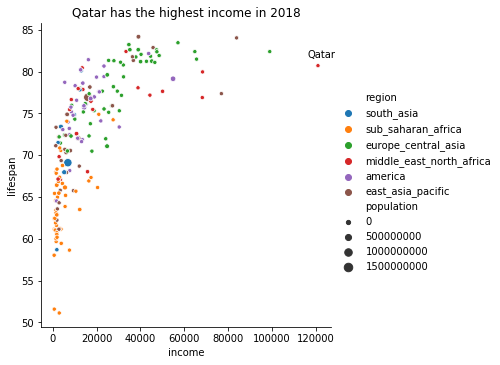

In [49]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now)

plt.text(x=qatar_income - 5000, y=qatar_lifespan + 1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

## Plot multiple years

In [50]:
years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]
centuries.describe()

,year,income,lifespan,population
count,552.000000,552.000000,552.000000,5.520000e+02
mean,1918.000000,6972.963768,42.402736,1.895547e+07
std,81.723717,13745.461356,23.146963,9.202077e+07
min,1818.000000,351.000000,1.090000,2.207000e+03
25%,1818.000000,854.250000,25.982500,4.440450e+05
50%,1918.000000,1476.500000,32.800000,2.167896e+06
75%,2018.000000,5311.250000,67.110000,9.425904e+06
max,2018.000000,121033.000000,84.170000,1.415046e+09


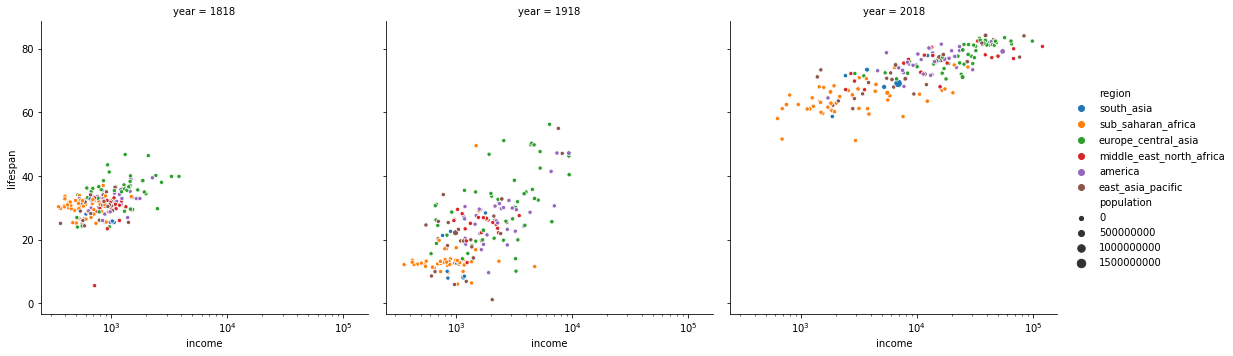

In [51]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            col='year', data=centuries)
plt.xscale('log');

## Point out a story


Rank	Death toll (estimate)	Event*	Location	Date
1.	1,000,000–4,000,000	1931 China floods	China	July 1931
2.	≥500,000[2]	1970 Bhola cyclone	East Pakistan (now Bangladesh)	November 1970
3.	316,000[9]	2010 Haiti earthquake	Haiti	January 12, 2010
4.	273,400	1920 Haiyuan earthquake	China	December 16, 1920
5.	242,769–655,000	1976 Tangshan earthquake	China	July 28, 1976
6.	229,000	Typhoon Nina—contributed to Banqiao Dam failure	China	August 7, 1975
7.	227,898	2004 Indian Ocean earthquake and tsunami	Indian Ocean	December 26, 2004
8.	145,000	1935 Yangtze river flood	China	1935
9.	143,000	1923 Great Kantō earthquake	Japan	September 1, 1923
10.	138,866	1991 Bangladesh cyclone	Bangladesh	April 1991


In [155]:
from google.colab import files
uploaded = files.upload()


Saving ag_prd_food_xd.csv to ag_prd_food_xd.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['ag_prd_food_xd.csv']))
# Dataset is now stored in a Pandas Dataframe


In [ ]:
df2.country.value_counts()
# (exclude=df2.describe(np.numbers=false)

In [ ]:
china = df2[df2['country'] == 'China']
china = china.melt()
india = df2[df2['country'] == 'India']
india = india.melt()
china.columns = ['year','food']
india.columns = ['year','food']
china.drop(china.index[0], inplace=True)
india.drop(india.index[0], inplace=True)
usmelt = us.melt()
usmelt.columns = ['year','food']
usmelt.drop(usmelt.index[0], inplace=True)
china.plot()
india.plot()
usmelt.plot();

In [289]:
# china['country'] = 'china'
# usmelt['country'] = 'us'
# india['country']= 'india'
# allin = pd.merge(us,china,how='outter', on='year')
us2 = df2[(['country'] == 'United States') & (['country'] == 'China') & (['country'] == 'India')]

KeyError: ignored

ValueError: ignored

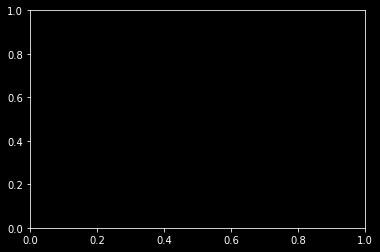

In [216]:
# 
# Basic stacked area chart.
plt.stackplot(usmelt, labels=yearz)
plt.legend(loc='upper left')


In [ ]:

df.population.describe()
df.country.value_counts().unique()

In [178]:
us = now[now['country'] == 'United States']
us_income = qatar['income'].values[0]
us_lifespan = us['lifespan'].values[0]
print(us_income, us_lifespan)

121033 79.14


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

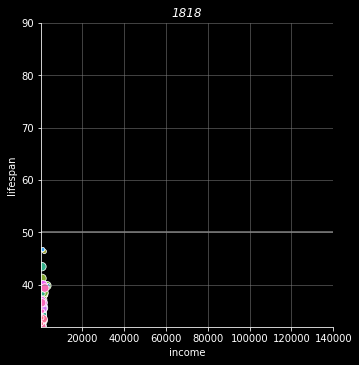

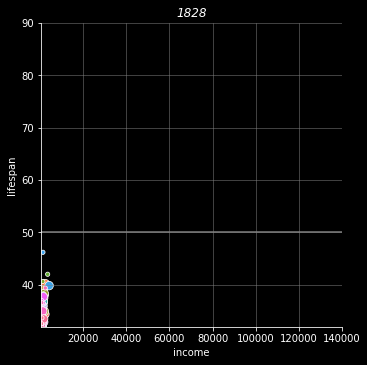

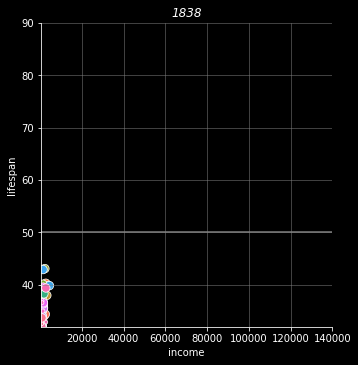

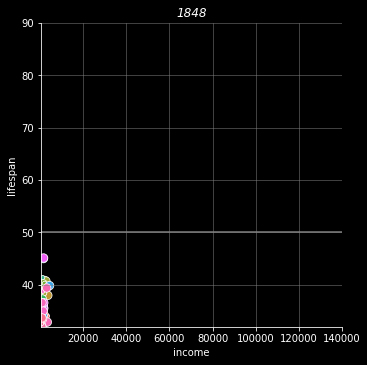

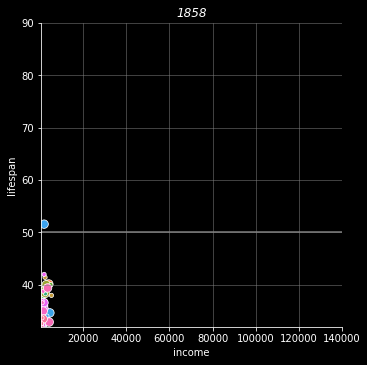

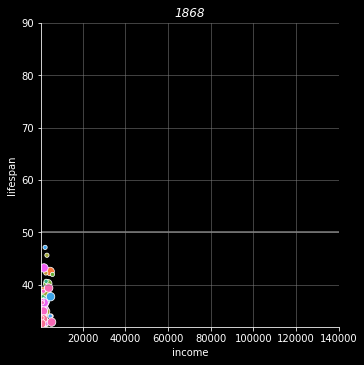

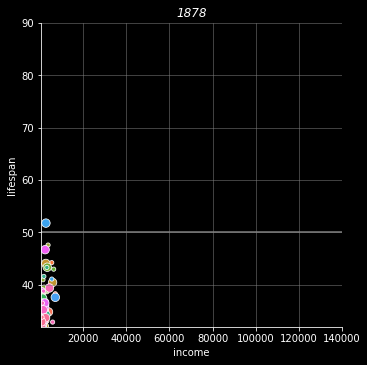

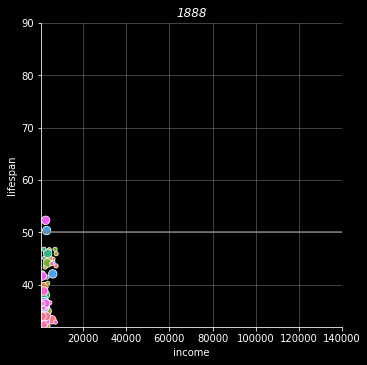

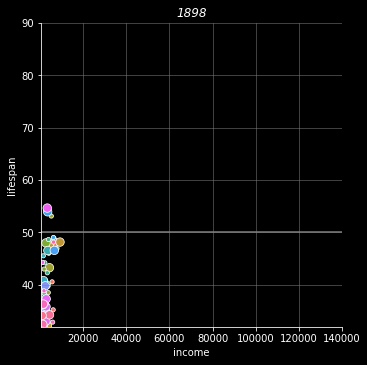

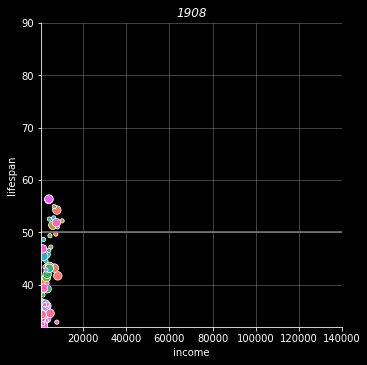

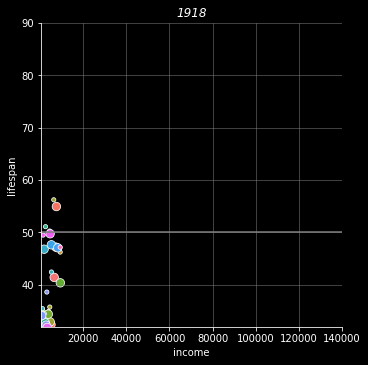

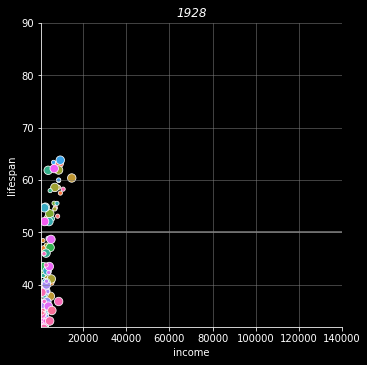

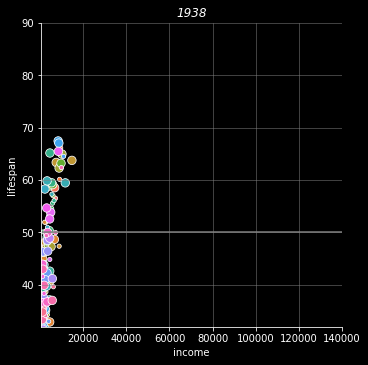

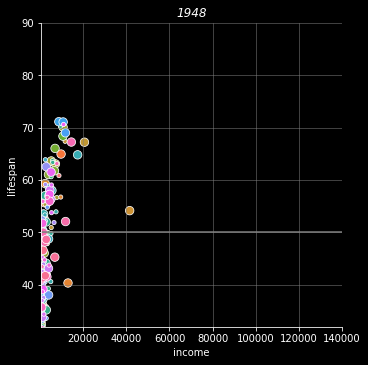

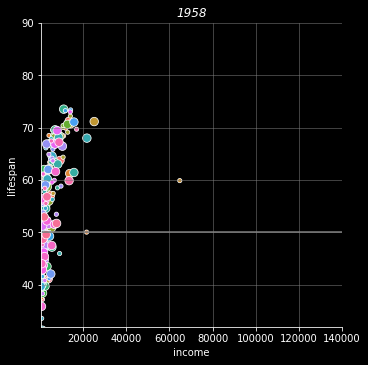

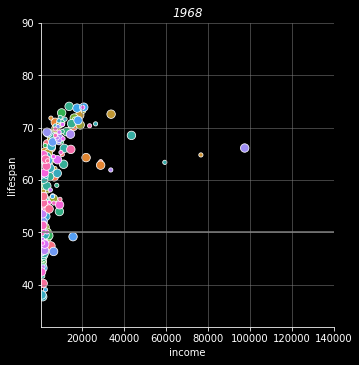

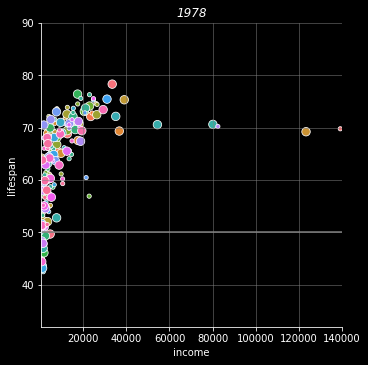

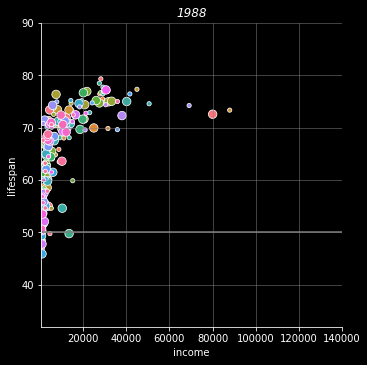

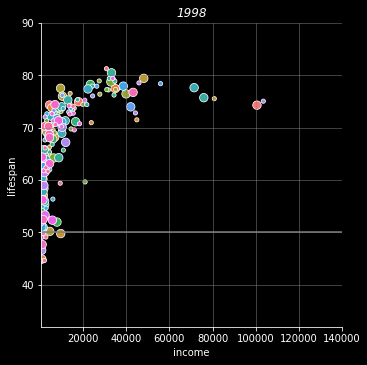

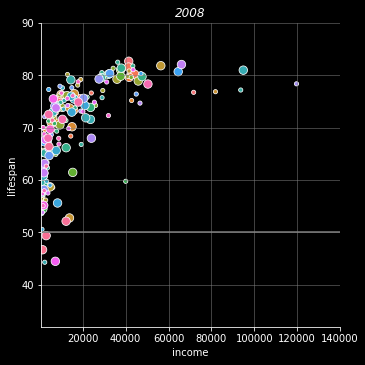

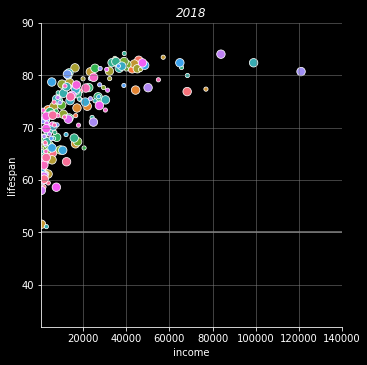

In [200]:
# def plot_save():
#   for plot in plots:
#     x = 1
#     filename = (f"{x}snsplot.png")
#     fig = plt.get_figure()
#     fig.savefig(filename)
#     x += 1
plt.tight_layout()
plt.style.use(['dark_background'])
years = list(range(1818, 2019,10))
size = (df['population']*14)**10
colors = sns.color_palette("CMRmap", n_colors=219, desat=.6)
  #  
for year in years:
  
  sns.relplot(x='income', y='lifespan',cmap=colors, hue='country', 
        size=size,
        data=df[df['year'] == year], legend=False)
  plt.grid(b=True, which='major', axis='both', color='grey', linestyle='-', linewidth=.5)
  plt.title(year, style='oblique')
  plt.axhline(y=50, color='grey');
  plt.xlim((400, 140000))
  plt.ylim((32, 90))
  #save plot per element
  plt.savefig(f"{year}.png")
# plt.xscale('log')



# plot_save()